In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## EDA

### Dataset Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
# Check for duplicates
df.duplicated().sum()

0

In [6]:
# Check for missing values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

### Data Distribution

Skewness of crim: 5.21


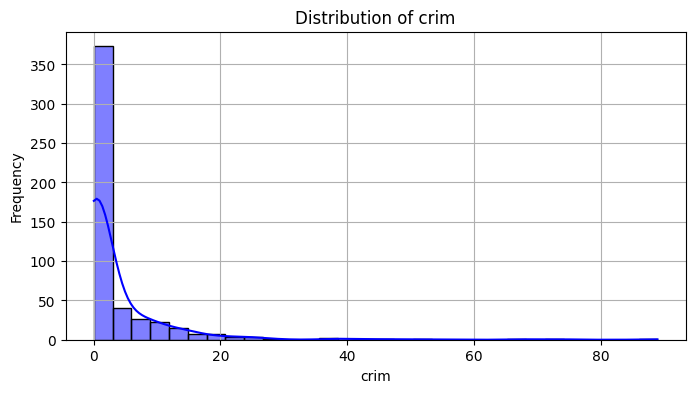

Skewness of zn: 2.22


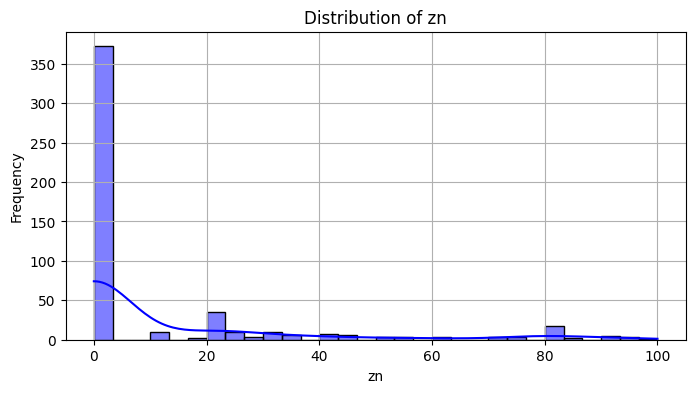

Skewness of indus: 0.29


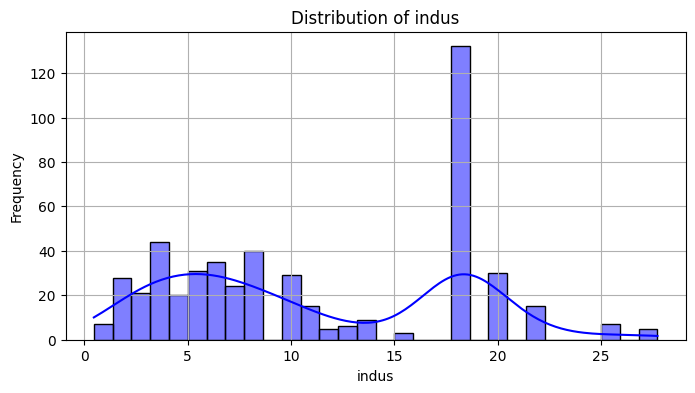

Skewness of chas: 3.40


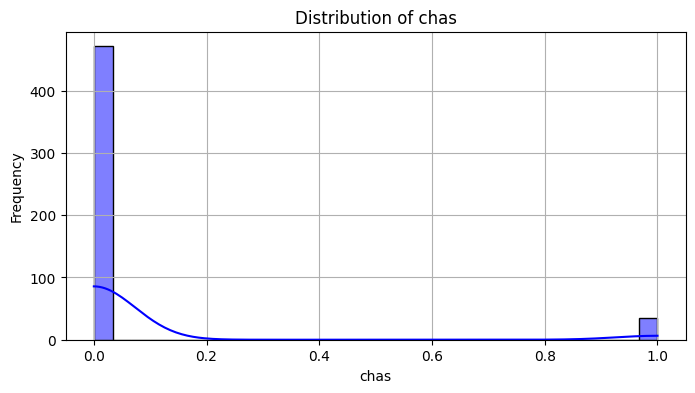

Skewness of nox: 0.73


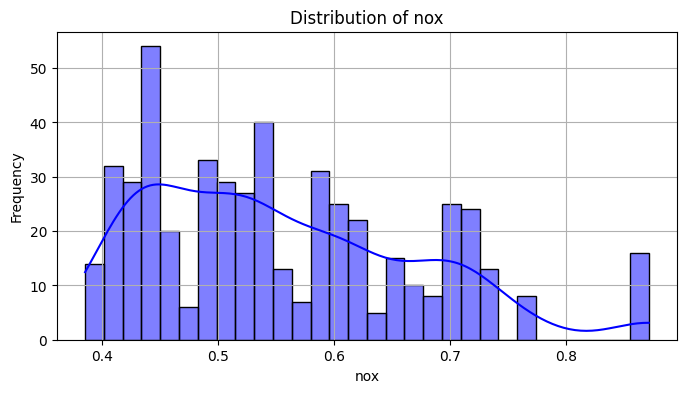

Skewness of rm: 0.40


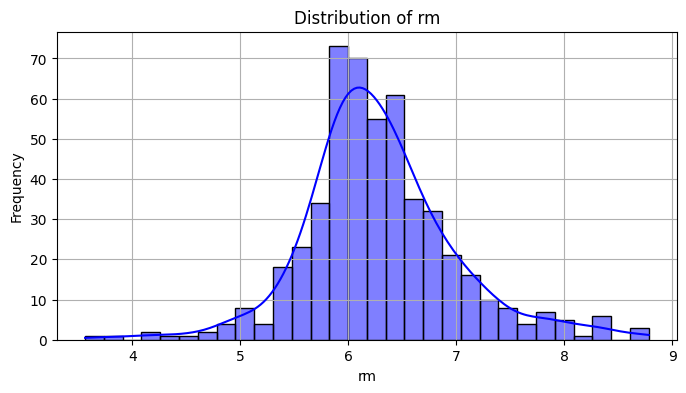

Skewness of age: -0.60


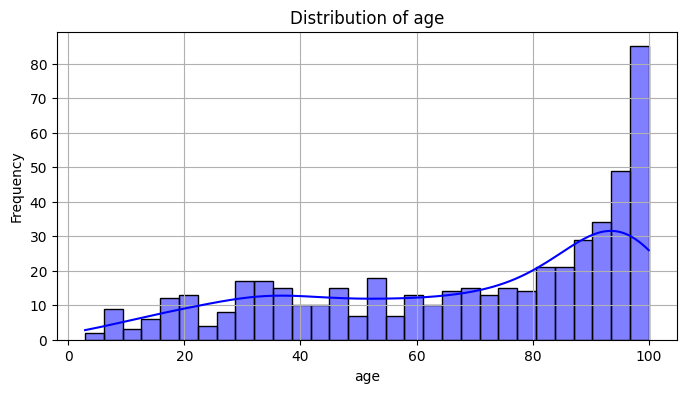

Skewness of dis: 1.01


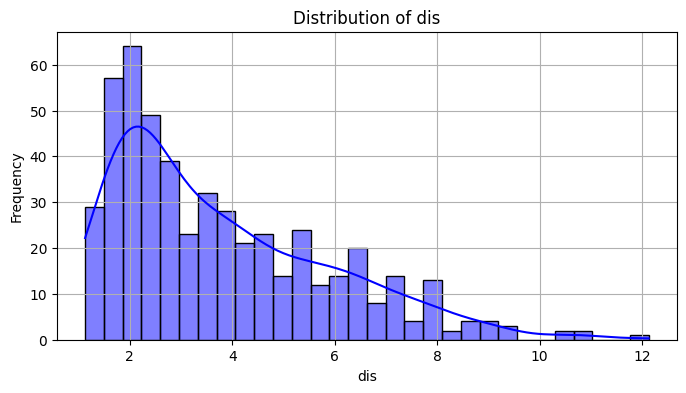

Skewness of rad: 1.00


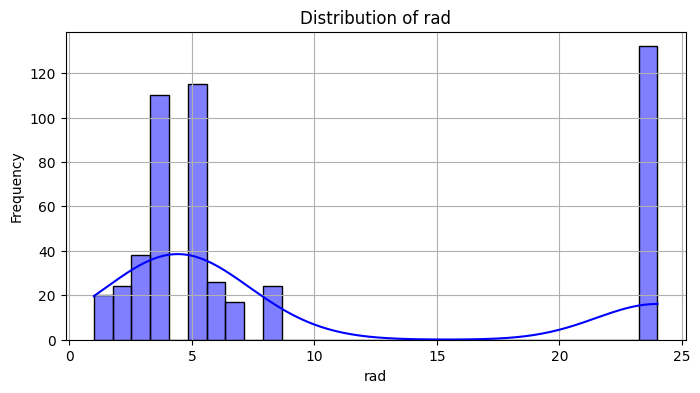

Skewness of tax: 0.67


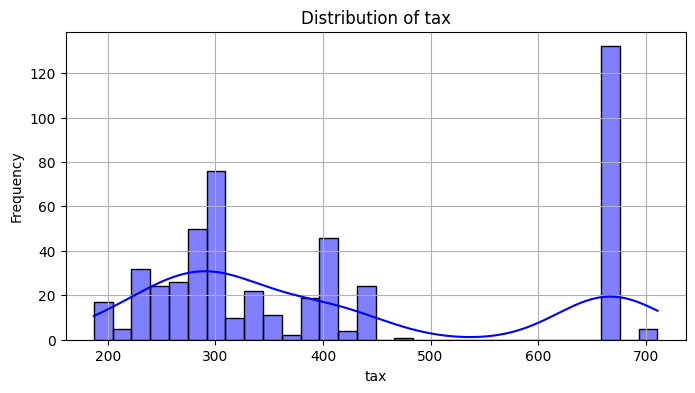

Skewness of ptratio: -0.80


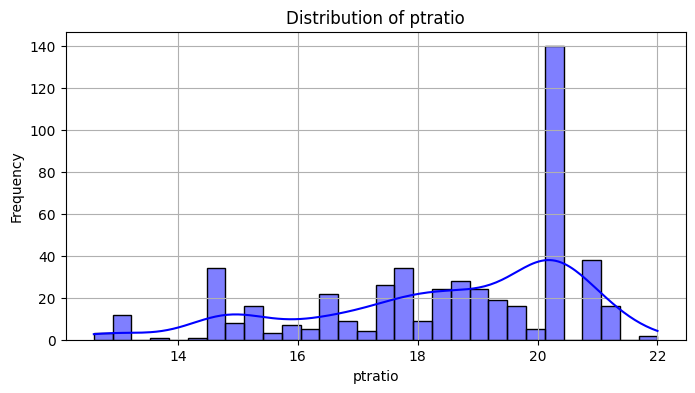

Skewness of b: -2.88


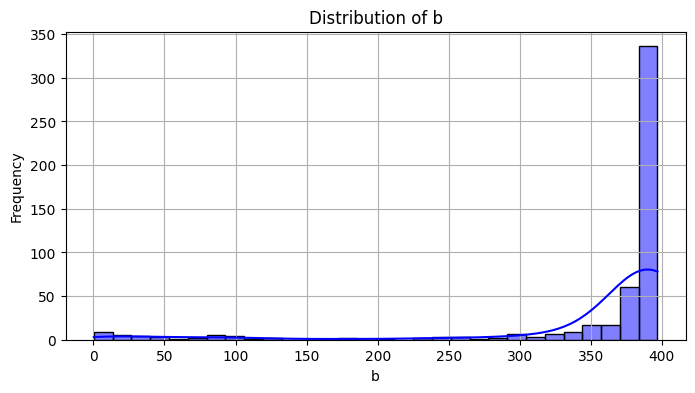

Skewness of lstat: 0.90


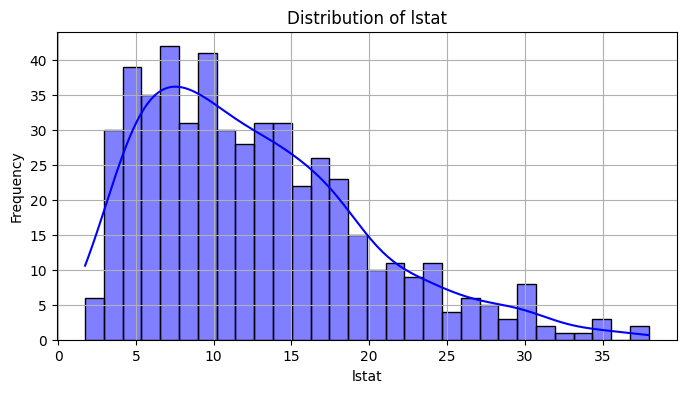

Skewness of medv: 1.10


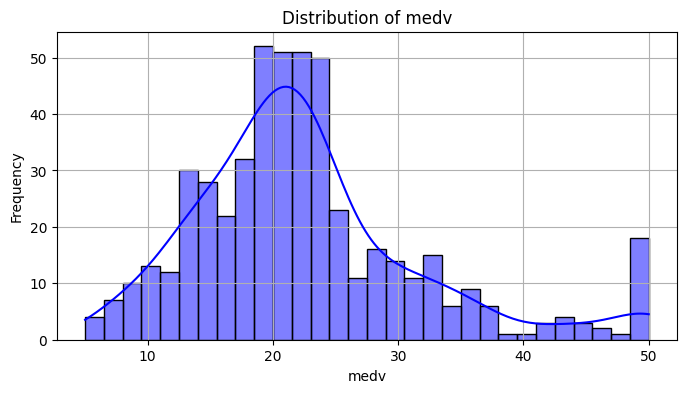

In [7]:
from scipy.stats import skew

# Visualisasi distribusi data untuk setiap kolom numerik
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    # Hitung skewness
    skewness = skew(df[col])
    print(f"Skewness of {col}: {skewness:.2f}")

    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

## Feature Engineering

### Dealing with Outliers

In [8]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the specified column
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
df_no_outliers = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(f"Original dataset size: {df.shape[0]}")
print(f"Dataset size after removing outliers: {df_no_outliers.shape[0]}")

Original dataset size: 506
Dataset size after removing outliers: 466


In [9]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     466 non-null    float64
 1   zn       466 non-null    float64
 2   indus    466 non-null    float64
 3   chas     466 non-null    int64  
 4   nox      466 non-null    float64
 5   rm       466 non-null    float64
 6   age      466 non-null    float64
 7   dis      466 non-null    float64
 8   rad      466 non-null    int64  
 9   tax      466 non-null    int64  
 10  ptratio  466 non-null    float64
 11  b        466 non-null    float64
 12  lstat    466 non-null    float64
 13  medv     466 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 54.6 KB


### Correlation

<Axes: >

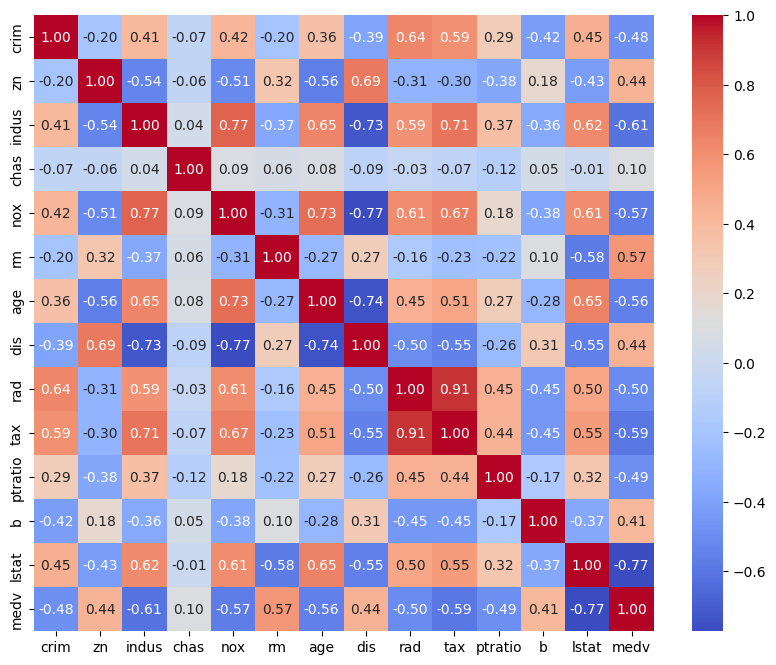

In [10]:
correlation = df_no_outliers.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')

## Input for Model

### Splitting the Data

In [11]:
X = df_no_outliers.drop(columns=['medv'])
y = df_no_outliers['medv']

### Scaling the Data

In [12]:
from sklearn.preprocessing import PowerTransformer

# Using Yeo-Johnson transformation for numerical features
scaler = PowerTransformer(method='yeo-johnson')

# Apply transformation to numerical features except 'medv'
X = scaler.fit_transform(X)

# Convert the transformed data back to DataFrame
X = pd.DataFrame(X, columns=df_no_outliers.drop(columns=['medv']).columns)

# Tampilkan data setelah transformasi
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-1.051742,1.666002,-1.577098,-0.252838,0.011776,0.674610,-0.217668,0.428528,-2.292549,-0.601741,-1.499657,0.623581,-1.509497
1,-0.996659,-0.582151,-0.507347,-0.252838,-0.728663,0.393198,0.311851,0.781575,-1.442904,-1.226170,-0.619787,0.623581,-0.480764
2,-0.996710,-0.582151,-0.507347,-0.252838,-0.728663,1.841220,-0.368717,0.781575,-1.442904,-1.226170,-0.619787,0.504325,-1.834927
3,-0.983705,-0.582151,-1.616375,-0.252838,-0.863398,1.474792,-0.898696,1.128437,-0.911749,-1.513776,-0.168007,0.556685,-2.284926
4,-0.893354,-0.582151,-1.616375,-0.252838,-0.863398,1.766130,-0.614573,1.128437,-0.911749,-1.513776,-0.168007,0.623581,-1.401270


### Splitting Train and Test Data

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## XG Boost Regressor

### Base Model

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

def training (model, X_train, y_train):
    # Training the model
    model.fit(X_train, y_train)

    # Predict the value
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse_xgb = mean_squared_error(y_test, y_pred)
    rmse_xgb = np.sqrt(mse_xgb)
    r2_xgb = r2_score(y_test, y_pred)


    print(f"Mean Squared Error (MSE) XGBoost: {mse_xgb}")
    print(f"Root Mean Squared Error (RMSE) XGBoost: {rmse_xgb}")
    print(f"R-squared (R2) XGBoost: {r2_xgb}")

    # Visualize the results
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='tomato')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Regression: Actual vs Predicted')
    plt.grid(True)
    plt.show()

Mean Squared Error (MSE) XGBoost: 6.799944586724688
Root Mean Squared Error (RMSE) XGBoost: 2.6076703370488934
R-squared (R2) XGBoost: 0.8304906718207027


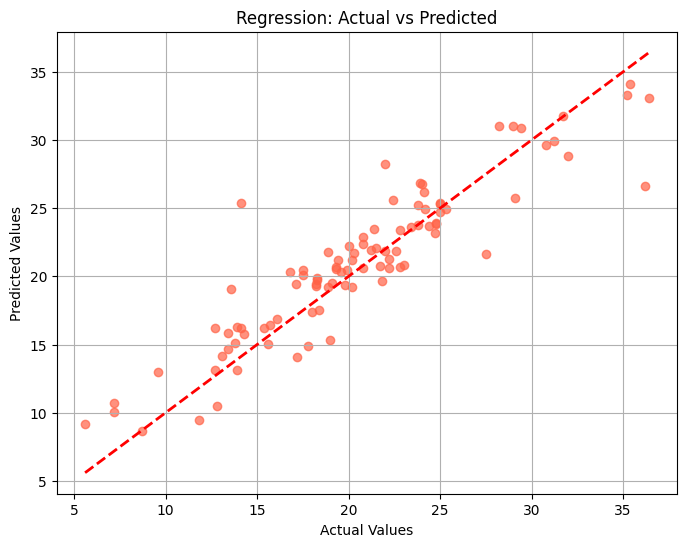

In [15]:
from xgboost import XGBRegressor

model = XGBRegressor(random_state=42, objective='reg:squarederror')
training(model, X_train, y_train)

### Hyperparameter Tuning

In [16]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Perform the grid search
grid_search.fit(X, y)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best Score: 10.99209949282031


Model training completed with tuned parameters.
Mean Squared Error (MSE) XGBoost: 0.9319225829079553
Root Mean Squared Error (RMSE) XGBoost: 0.9653613742573064
R-squared (R2) XGBoost: 0.9767689914338065


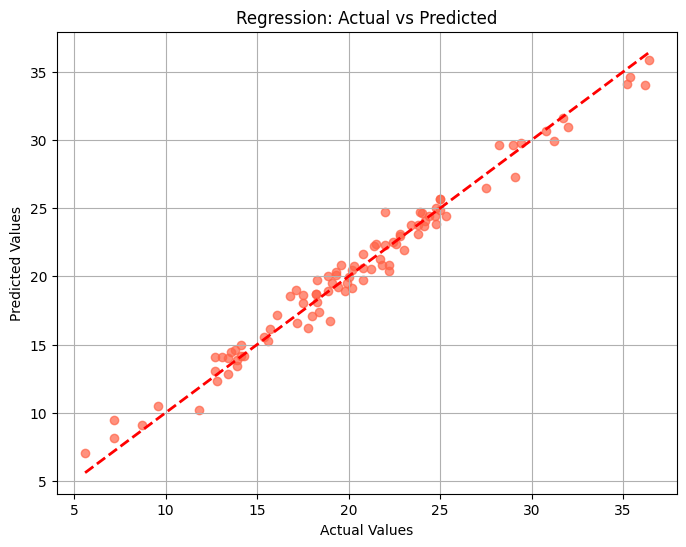

In [17]:
# Extract the best parameters from the grid search
best_params = grid_search.best_params_

# Initialize the XGBoost model with the best parameters
tuned_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    **best_params
)

# Train the model on the training data
print("Model training completed with tuned parameters.")
training(tuned_model, X, y)

## Bagging

Mean Squared Error (MSE): 6.179590212765958
Root Mean Squared Error (RMSE): 2.485878157264744
R-squared (R2): 0.8459548938921775


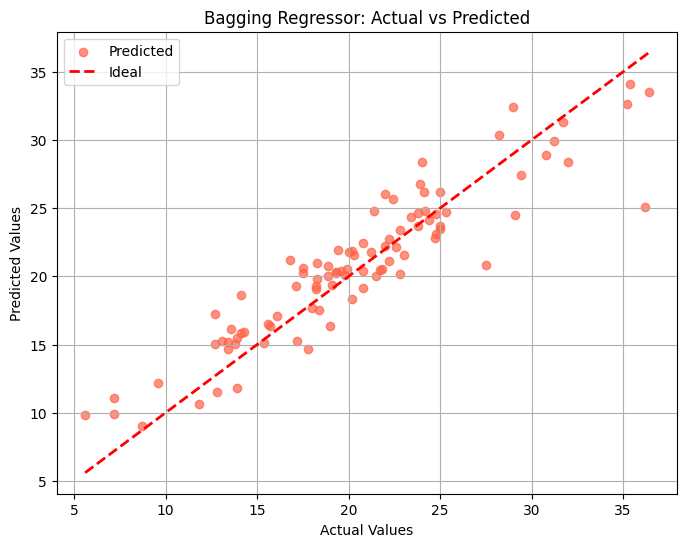

In [18]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Initialize the base model
base_model = DecisionTreeRegressor(random_state=42)

# Create the Bagging Regressor
bagging_model = BaggingRegressor(
    estimator=base_model,
    n_estimators=50,  # Number of base models
    random_state=42,
    n_jobs=-1
)

def training_bagging (bagging_model, X_train, y_train):
    # Train the Bagging Regressor
    bagging_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred_bagging = bagging_model.predict(X_test)

    # Evaluate the model
    mse_bagging = mean_squared_error(y_test, y_pred_bagging)
    rmse_bagging = np.sqrt(mse_bagging)
    r2_bagging = r2_score(y_test, y_pred_bagging)

    print(f"Mean Squared Error (MSE): {mse_bagging}")
    print(f"Root Mean Squared Error (RMSE): {rmse_bagging}")
    print(f"R-squared (R2): {r2_bagging}")

    # Visualisasi hasil prediksi Bagging Regressor
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred_bagging, alpha=0.7, color='tomato', label='Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Ideal')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Bagging Regressor: Actual vs Predicted')
    plt.legend()
    plt.grid(True)
    plt.show()

training_bagging(bagging_model, X_train, y_train)

### Hyperparameter Tuning

In [19]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_bagging = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# Initialize the GridSearchCV object
grid_search_bagging = GridSearchCV(
    estimator=BaggingRegressor(estimator=base_model, random_state=42, n_jobs=-1),
    param_grid=param_grid_bagging,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Perform the grid search
grid_search_bagging.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters for Bagging Regressor:", grid_search_bagging.best_params_)
print("Best Score for Bagging Regressor:", -grid_search_bagging.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Bagging Regressor: {'bootstrap': False, 'bootstrap_features': False, 'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 100}
Best Score for Bagging Regressor: 6.811042174558558


Mean Squared Error (MSE): 6.331781
Root Mean Squared Error (RMSE): 2.5163030421632446
R-squared (R2): 0.8421610750205524


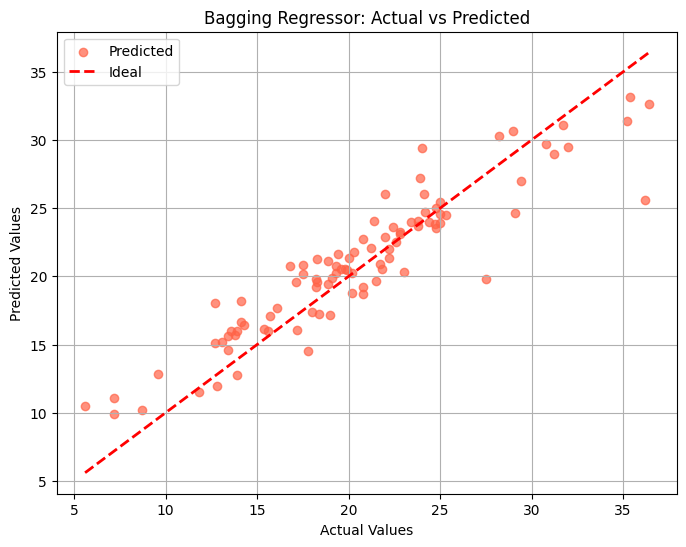

In [20]:
# Extract the best parameters from the grid search for Bagging Regressor
best_params_bagging = grid_search_bagging.best_params_

# Initialize the Bagging Regressor with the best parameters
tuned_bagging_model = BaggingRegressor(
    estimator=base_model,
    n_estimators=best_params_bagging['n_estimators'],
    max_samples=best_params_bagging['max_samples'],
    max_features=best_params_bagging['max_features'],
    bootstrap=best_params_bagging['bootstrap'],
    bootstrap_features=best_params_bagging['bootstrap_features'],
    random_state=42,
    n_jobs=-1
)


# Train the tuned Bagging Regressor
training_bagging(tuned_bagging_model, X_train, y_train)